# data.world
## C-Span Inaugural Address


### Getting the data

The data is stored in data.world

> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[PANDAS]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [1]:
import datadotworld as dw
import pandas as pd

In [2]:
# Load dataset (onto the local file system)
force_update = True
dataset_local = dw.load_dataset('brianray/c-span-inaugural-address',
                                force_update=force_update)  # cached under ~/.dw/cache

In [3]:
# See what is in it
dataset_local.describe()

{'homepage': 'https://data.world/brianray/c-span-inaugural-address',
 'name': 'brianray_c-span-inaugural-address',
 'resources': [{'format': 'csv',
   'name': 'uspresident-wikipedia-urls-thmbs-hs_brray',
   'path': 'data/USPresident-Wikipedia-URLs-Thmbs-HS_brray.csv'},
  {'format': 'csv',
   'name': 'c-span-inagural-addresses',
   'path': 'data/c-span-inagural-addresses.csv'}]}

In [4]:
dataset_local.dataframes

LazyLoadedDict({'uspresident-wikipedia-urls-thmbs-hs_brray': LazyLoadedValue(<pandas.DataFrame>), 'c-span-inagural-addresses': LazyLoadedValue(<pandas.DataFrame>)})

In [5]:
df_presidents = dataset_local.dataframes['uspresident-wikipedia-urls-thmbs-hs_brray']
df_inagural = dataset_local.dataframes['c-span-inagural-addresses']

In [6]:
df_inagural.head()

,year,president,speach content
0,1789,Washington,Fellow-Citizens of the Senate and of the House...
1,1793,Washington,"Fellow citizens, I am again called upon by the..."
2,1797,Adams,"When it was first perceived, in early times, t..."
3,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805,Jefferson,"Proceeding, fellow citizens, to that qualifica..."


In [7]:
df_presidents.head()


,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State
0,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-30,1797-03-04,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia
1,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-03-04,1801-03-04,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts
2,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-03-04,1809-03-04,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia
3,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-03-04,1817-03-04,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia
4,5,James Monroe,http://en.wikipedia.org/wiki/James_Monroe,1817-03-04,1825-03-04,Democratic-Republican,JamesMonroe.gif,thmb_JamesMonroe.gif,Virginia


In [8]:
"George Washington".split()[-1:][0]

'Washington'

In [9]:
df_presidents['short name'] = df_presidents.apply(lambda x: x['President'].split()[-1:][0], axis=1)
df = pd.merge(df_inagural, df_presidents, left_on='president', right_on='short name')
df

,year,president,speach content,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State,short name
0,1789,Washington,Fellow-Citizens of the Senate and of the House...,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-30 00:00:00.000000000,1797-03-04 00:00:00.000000000,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,Washington
1,1793,Washington,"Fellow citizens, I am again called upon by the...",1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-30 00:00:00.000000000,1797-03-04 00:00:00.000000000,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,Washington
2,1797,Adams,"When it was first perceived, in early times, t...",2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-03-04 00:00:00.000000000,1801-03-04 00:00:00.000000000,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,Adams
3,1797,Adams,"When it was first perceived, in early times, t...",6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-03-04 00:00:00.000000000,1829-03-04 00:00:00.000000000,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,Adams
4,1825,Adams,In compliance with an usage coeval with the ex...,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-03-04 00:00:00.000000000,1801-03-04 00:00:00.000000000,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,Adams
5,1825,Adams,In compliance with an usage coeval with the ex...,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-03-04 00:00:00.000000000,1829-03-04 00:00:00.000000000,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,Adams
6,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-03-04 00:00:00.000000000,1809-03-04 00:00:00.000000000,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Jefferson
7,1805,Jefferson,"Proceeding, fellow citizens, to that qualifica...",3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-03-04 00:00:00.000000000,1809-03-04 00:00:00.000000000,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Jefferson
8,1809,Madison,Unwilling to depart from examples of the most ...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-03-04 00:00:00.000000000,1817-03-04 00:00:00.000000000,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,Madison
9,1813,Madison,About to add the solemnity of an oath to the o...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-03-04 00:00:00.000000000,1817-03-04 00:00:00.000000000,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,Madison


### Clustring



In [10]:
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

stemmer = SnowballStemmer("english")

#  http://brandonrose.org/clustering
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

#define vectorizer parameters


stop_words = text.ENGLISH_STOP_WORDS.union(["'s", "mr.", "let", "come"])
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, 
                                   max_features=100000,
                                   min_df=0.2,
                                   stop_words=stop_words,
                                   use_idf=True,
                                   tokenizer=tokenize_and_stem,
                                   ngram_range=(1,3))
synopses = list(df['speach content'])
%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 4.14 s, sys: 24.7 ms, total: 4.16 s
Wall time: 4.16 s
(70, 822)


In [11]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [12]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 163724 items in vocab_frame


In [13]:
terms = tfidf_vectorizer.get_feature_names()

In [14]:
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
df['cluster'] = clusters
df

CPU times: user 972 ms, sys: 11.8 ms, total: 984 ms
Wall time: 382 ms


,year,president,speach content,Presidency,President,Wikipedia Entry,Took office,Left office,Party,Portrait,Thumbnail,Home State,short name,cluster
0,1789,Washington,Fellow-Citizens of the Senate and of the House...,1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-30 00:00:00.000000000,1797-03-04 00:00:00.000000000,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,Washington,0
1,1793,Washington,"Fellow citizens, I am again called upon by the...",1,George Washington,http://en.wikipedia.org/wiki/George_Washington,1789-04-30 00:00:00.000000000,1797-03-04 00:00:00.000000000,Independent,GeorgeWashington.jpg,thmb_GeorgeWashington.jpg,Virginia,Washington,5
2,1797,Adams,"When it was first perceived, in early times, t...",2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-03-04 00:00:00.000000000,1801-03-04 00:00:00.000000000,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,Adams,0
3,1797,Adams,"When it was first perceived, in early times, t...",6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-03-04 00:00:00.000000000,1829-03-04 00:00:00.000000000,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,Adams,0
4,1825,Adams,In compliance with an usage coeval with the ex...,2,John Adams,http://en.wikipedia.org/wiki/John_Adams,1797-03-04 00:00:00.000000000,1801-03-04 00:00:00.000000000,Federalist,JohnAdams.jpg,thmb_JohnAdams.jpg,Massachusetts,Adams,0
5,1825,Adams,In compliance with an usage coeval with the ex...,6,John Quincy Adams,http://en.wikipedia.org/wiki/John_Quincy_Adams,1825-03-04 00:00:00.000000000,1829-03-04 00:00:00.000000000,Democratic-Republican/National Republican,JohnQuincyAdams.gif,thmb_JohnQuincyAdams.gif,Massachusetts,Adams,0
6,1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-03-04 00:00:00.000000000,1809-03-04 00:00:00.000000000,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Jefferson,0
7,1805,Jefferson,"Proceeding, fellow citizens, to that qualifica...",3,Thomas Jefferson,http://en.wikipedia.org/wiki/Thomas_Jefferson,1801-03-04 00:00:00.000000000,1809-03-04 00:00:00.000000000,Democratic-Republican,Thomasjefferson.gif,thmb_Thomasjefferson.gif,Virginia,Jefferson,2
8,1809,Madison,Unwilling to depart from examples of the most ...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-03-04 00:00:00.000000000,1817-03-04 00:00:00.000000000,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,Madison,0
9,1813,Madison,About to add the solemnity of an oath to the o...,4,James Madison,http://en.wikipedia.org/wiki/James_Madison,1809-03-04 00:00:00.000000000,1817-03-04 00:00:00.000000000,Democratic-Republican,JamesMadison.gif,thmb_JamesMadison.gif,Virginia,Madison,2


In [15]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

cluster_words = {}
for i in range(num_clusters):
    cluster_words[i] = []
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        cluster_words[i].append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
pd.DataFrame.from_dict(cluster_words, orient="index")

Top terms per cluster:



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,union,public,constitutional,states,war,principles,foreign,general,duties,happiness,party,form,honorable,opinions,equal,author,improve,mind,present,respect
1,today,man,freedom,learn,america,together,work,god,help,day,believe,live,old,knowingly,change,democracy,way,friends,words,presides
2,states,constitutional,union,public,united,laws,united,war,duties,executing,important,principles,objects,preservation,revenue,opinions,foreign,general,congress,author
3,america,freedom,knowingly,because,live,today,ideal,democracy,work,responsibility,history,generations,promises,challenge,century,build,spirit,together,god,human
4,problem,things,face,ourselves,task,purposes,spirit,actions,set,day,republics,help,democracy,use,duties,mere,wishes,very,industry,change
5,laws,states,public,executing,constitutional,office,congress,duties,policy,business,methods,enforced,civil,party,administration,promoted,best,question,united,subject


In [16]:
df = df.sort_values(['cluster', 'year'])
df[['year', 'president', 'cluster', 'Party']]

,year,president,cluster,Party
0,1789,Washington,0,Independent
2,1797,Adams,0,Federalist
3,1797,Adams,0,Democratic-Republican/National Republican
6,1801,Jefferson,0,Democratic-Republican
8,1809,Madison,0,Democratic-Republican
4,1825,Adams,0,Federalist
5,1825,Adams,0,Democratic-Republican/National Republican
23,1865,Lincoln,0,Republican/National Union
40,1945,Roosevelt,1,Republican
41,1945,Roosevelt,1,Democratic


In [17]:
# https://medium.com/@mishra.thedeepak/doc2vec-in-a-simple-way-fa80bfe81104

In [18]:
#Import all the dependencies
import gensim
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join

In [33]:
docLabels = ["{year}_{president}".format(**x) for x in df_inagural[['year', 'president']].to_dict(orient="records")]
data = list(df_inagural['speach content'])

In [34]:
tokenizer = RegexpTokenizer(r'\w+')
stopword_set = set(stopwords.words('english'))
#This function does all cleaning of data using two objects above
def nlp_clean(data):
    new_data = []
    for d in data:
        new_str = d.lower()
        dlist = tokenizer.tokenize(new_str)
        dlist = list(set(dlist).difference(stopword_set))
        new_data.append(dlist)
    return new_data

In [35]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
[self.labels_list[idx]])

In [36]:
data = nlp_clean(data)

In [37]:
it = LabeledLineSentence(data, docLabels)

In [38]:
model = gensim.models.Doc2Vec(size=300, min_count=0, alpha=0.025, min_alpha=0.025)
model.build_vocab(it)
#training of model
for epoch in range(100):
    print('iteration {}'.format(epoch+1))
    model.train(it)
    model.alpha -= 0.002
    model.min_alpha = model.alpha
    model.train(it)
#saving the created model
#model.save(‘doc2vec.model’)
# print("model saved")

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [39]:

d2v_model = model
d2v_model.docvecs.similarity('2017_Trump', '2009_Obama')

0.96716047165445129

In [61]:
import numpy as np 
from pandas import DataFrame
%matplotlib


df = DataFrame(index=docLabels, columns=docLabels)

for x in docLabels:
    for y in docLabels:
        val = np.float64(d2v_model.docvecs.similarity(x, y))
        df.set_value(x, y, val*1000)
df = df[df.columns].astype(float)  # or int
df

Using matplotlib backend: MacOSX


,1789_Washington,1793_Washington,1797_Adams,1801_Jefferson,1805_Jefferson,1809_Madison,1813_Madison,1817_Monroe,1821_Monroe,1825_Adams,...,1981_Reagan,1985_Reagan,1989_Bush,1993_Clinton,1997_Clinton,2001_Bush,2005_Bush,2009_Obama,2013_Obama,2017_Trump
1789_Washington,1000.000000,882.979841,957.648827,960.696173,948.044233,970.010809,961.262011,946.504226,950.413962,949.260092,...,914.247568,904.417637,920.637800,917.719980,916.179658,928.063011,920.263765,919.221272,927.262752,928.221769
1793_Washington,882.979841,1000.000000,884.701355,880.499655,872.720470,896.093523,883.105226,873.519029,876.492442,879.289074,...,837.552134,856.085976,868.581107,835.071016,851.557056,861.325168,838.433154,835.220527,862.724698,847.930093
1797_Adams,957.648827,884.701355,1000.000000,953.847084,960.803203,967.372460,954.056847,953.779111,956.236478,959.977973,...,921.110983,911.592794,926.426972,909.519571,912.029480,911.604838,918.465874,908.180439,921.654045,933.109067
1801_Jefferson,960.696173,880.499655,953.847084,1000.000000,955.576514,967.417191,957.008957,941.415275,947.440032,943.511523,...,932.532306,927.879821,936.677573,934.008645,933.427813,939.004845,938.950470,924.783430,932.849918,942.055232
1805_Jefferson,948.044233,872.720470,960.803203,955.576514,1000.000000,960.307189,961.020745,951.611306,949.384169,943.083807,...,925.979512,926.723342,927.484870,903.722940,909.570891,910.660510,914.846233,913.661421,912.465298,936.199305
1809_Madison,970.010809,896.093523,967.372460,967.417191,960.307189,1000.000000,964.807085,965.332292,963.298016,957.500540,...,915.182530,913.179443,915.474572,902.452163,909.865204,911.689783,908.539165,904.687031,907.134310,917.780754
1813_Madison,961.262011,883.105226,954.056847,957.008957,961.020745,964.807085,1000.000000,948.727049,954.807133,946.666326,...,936.704031,933.584534,942.893647,933.150539,940.024250,938.418919,938.963938,935.351686,936.883670,952.045402
1817_Monroe,946.504226,873.519029,953.779111,941.415275,951.611306,965.332292,948.727049,1000.000000,963.280014,953.281052,...,888.813539,882.821253,894.347211,874.111554,888.891769,887.783769,882.782112,880.945462,889.726923,904.243507
1821_Monroe,950.413962,876.492442,956.236478,947.440032,949.384169,963.298016,954.807133,963.280014,1000.000000,951.158458,...,898.629500,897.285145,907.297195,886.072082,897.245265,899.940580,889.571322,882.787921,896.534098,916.467379
1825_Adams,949.260092,879.289074,959.977973,943.511523,943.083807,957.500540,946.666326,953.281052,951.158458,1000.000000,...,905.263858,884.911547,912.694700,886.350330,904.303251,901.374192,892.256378,886.136301,901.146296,917.967616


/Users/brray/anaconda2/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


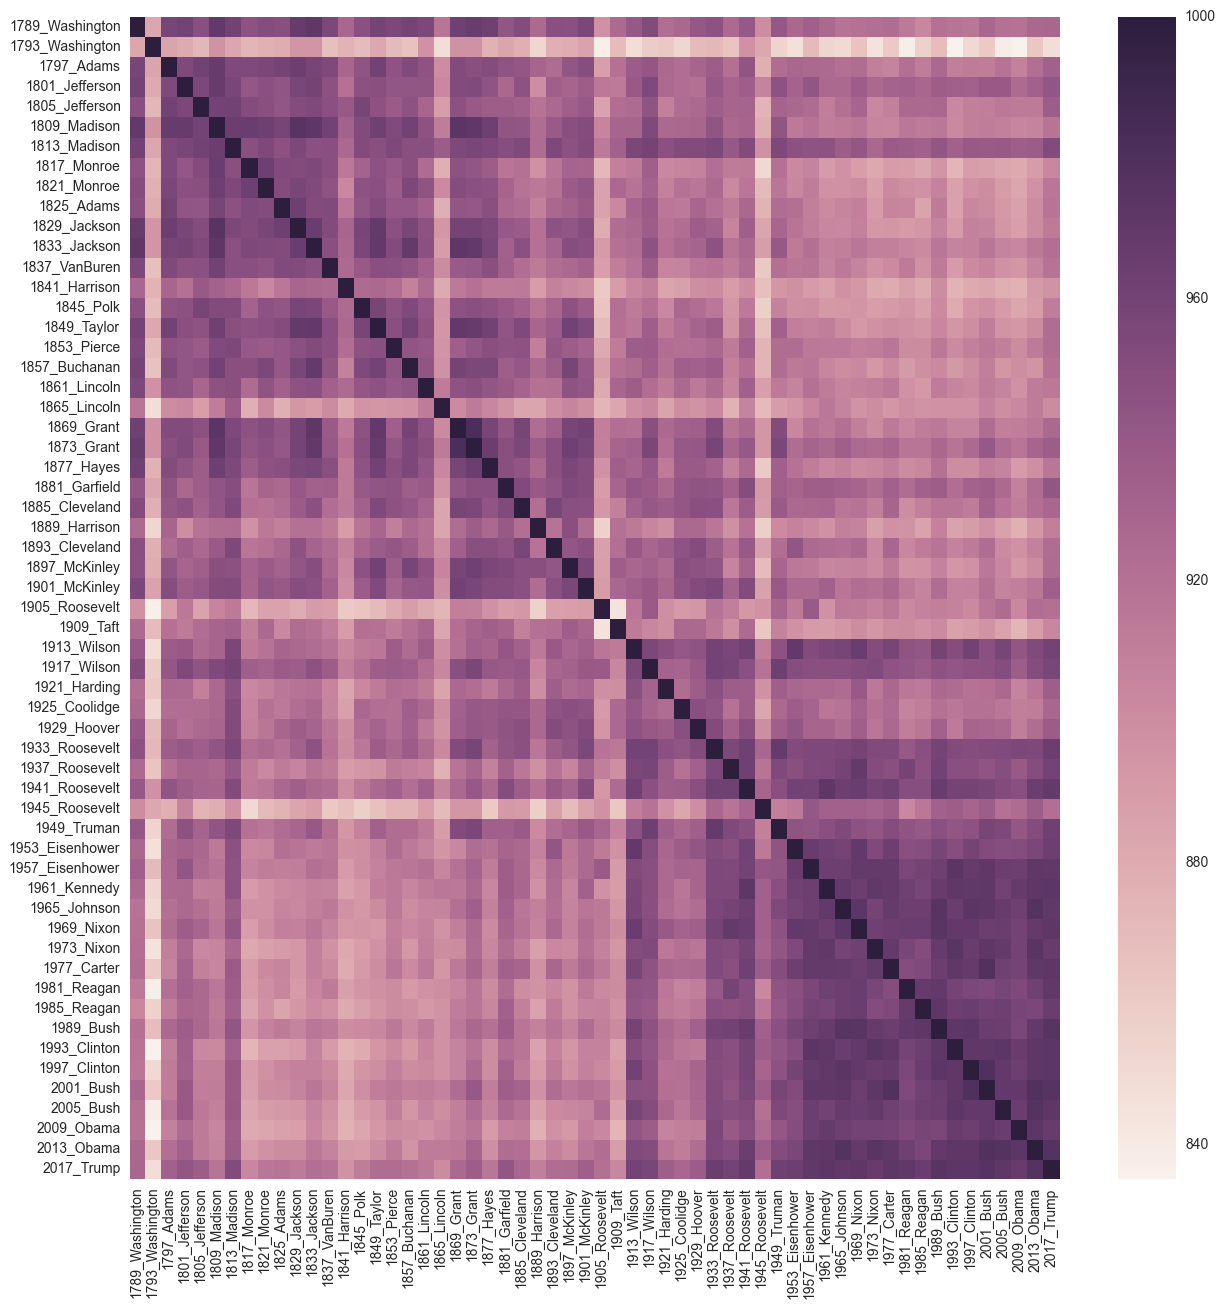

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 15))
sns.heatmap(df)